# Read_cubefile

This notebook opens the GLaIL cubefiles for 18H and 36H, GRD and SIR and displays them.
It also does a quick check for which layers are populated.  Note that AMSRE-E was launched in 
2002, so there are a lot of masked layers at the beginning of the year if you look at 2002 
data.

In [1]:
%pylab notebook
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import sys

Populating the interactive namespace from numpy and matplotlib


In [78]:
%cd /Users/brodzik/cetb_data/AQUA_AMSRE/N/cubes_GLaIL
%ls

/Users/brodzik/cetb_data/AQUA_AMSRE/N/cubes_GLaIL
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB.bin.gz
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB.bin.hdr
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB.nc
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB_time.bin.gz
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB_time.bin.hdr
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB_time.nc
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.Incidence_angle.bin.gz
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.Incidence_angle.bin.hdr
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.Incidence_angle.nc
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.bin.gz
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.bin.hdr
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.nc
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB_num_samples.bin.gz
CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB_num_samples.bin.hdr
C

In [84]:
list = glob.glob("*2003.TB.nc")
list

['CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.nc',
 'CETB.cubefile.GLaIL.AQUA_AMSRE-18H-SIR-RSS-v1.2.2003.TB.nc',
 'CETB.cubefile.GLaIL.AQUA_AMSRE-36H-GRD-RSS-v1.2.2003.TB.nc',
 'CETB.cubefile.GLaIL.AQUA_AMSRE-36H-SIR-RSS-v1.2.2003.TB.nc']

In [87]:
file_grd = list[0]
file_sir = list[1]
file_grd, file_sir

('CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.nc',
 'CETB.cubefile.GLaIL.AQUA_AMSRE-18H-SIR-RSS-v1.2.2003.TB.nc')

In [88]:
fid_grd = Dataset(file_grd, "r", "NETCDF4")
fid_sir = Dataset(file_sir, "r", "NETCDF4")

In [89]:
fid_grd

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3
    title: MEaSUREs Calibrated Passive Microwave Daily EASE-Grid 2.0 Brightness Temperature ESDR
    product_version: v1.2
    software_version_id: 0.2.31
    software_repository: git@bitbucket.org:nsidc/measures-byu.git
    history: Mon Oct  9 17:13:33 2017: /projects/brodzik/miniconda3/envs/cetb3/bin/ncrcat -O --output=/work/PMESDR/AQUA_AMSRE/N/cubes_GLAIL/CETB.cubefile.GLAIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2003.18H.GRD/GLAIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.NSIDC-0630-EASE2_N25km-AQUA_AMSRE-2003001-18H-M-GRD-RSS-v1.2.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2003.18H.GRD/GLAIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.NSIDC-0630-EASE2_N25km-AQUA_AMSRE-2003001-18H-E-GRD-RSS-v1.2.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2003.18H.GRD/GLAIL.AQUA_AMSRE-18H-GRD-RSS-v1.2.NSIDC-0630-EASE2_N25km-AQUA_AMSRE-2003002-18H-M-GRD-RSS-v1.2.n

In [90]:
fid_sir

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3
    title: MEaSUREs Calibrated Passive Microwave Daily EASE-Grid 2.0 Brightness Temperature ESDR
    product_version: v1.2
    software_version_id: 0.2.31
    software_repository: git@bitbucket.org:nsidc/measures-byu.git
    history: Mon Oct  9 17:38:42 2017: /projects/brodzik/miniconda3/envs/cetb3/bin/ncrcat -O --output=/work/PMESDR/AQUA_AMSRE/N/cubes_GLAIL/CETB.cubefile.GLAIL.AQUA_AMSRE-18H-SIR-RSS-v1.2.2003.TB.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2003.18H.SIR/GLAIL.AQUA_AMSRE-18H-SIR-RSS-v1.2.NSIDC-0630-EASE2_N6.25km-AQUA_AMSRE-2003001-18H-M-SIR-RSS-v1.2.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2003.18H.SIR/GLAIL.AQUA_AMSRE-18H-SIR-RSS-v1.2.NSIDC-0630-EASE2_N6.25km-AQUA_AMSRE-2003001-18H-E-SIR-RSS-v1.2.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2003.18H.SIR/GLAIL.AQUA_AMSRE-18H-SIR-RSS-v1.2.NSIDC-0630-EASE2_N6.25km-AQUA_AMSRE-2003002-18H-M-SIR-RSS-

In [91]:
tb_grd = fid_grd.variables["TB"][:]
tb_sir = fid_sir.variables["TB"][:]
print(tb_grd.shape, tb_sir.shape)

(730, 121, 102) (730, 484, 408)


In [92]:
print(np.amin(tb_grd), np.amax(tb_grd))
print(np.amin(tb_sir), np.amax(tb_sir))

89.44 308.35
81.65 349.15


In [93]:
for i in np.arange(0,730,40):
    print(i)
    layer_grd = tb_grd[i,:,:]
    layer_sir = tb_sir[i,:,:]
    print("i=%d, grd: min=%f, max=%f" % (i, np.amin(layer_grd), np.amax(layer_grd)))
    print("i=%d, sir: min=%f, max=%f" % (i, np.amin(layer_sir), np.amax(layer_sir)))
    

0
i=0, grd: min=93.540001, max=246.809998
i=0, sir: min=88.439995, max=257.790009
40
i=40, grd: min=92.180000, max=242.929993
i=40, sir: min=85.599998, max=253.080002
80
i=80, grd: min=93.009995, max=249.580002
i=80, sir: min=89.439995, max=258.739990
120
i=120, grd: min=94.519997, max=249.409988
i=120, sir: min=87.919998, max=274.720001
160
i=160, grd: min=95.470001, max=249.039993
i=160, sir: min=88.970001, max=275.630005
200
i=200, grd: min=91.949997, max=257.079987
i=200, sir: min=88.159996, max=271.259979
240
i=240, grd: min=93.970001, max=265.279999
i=240, sir: min=84.570000, max=275.750000
280
i=280, grd: min=95.349998, max=268.639984
i=280, sir: min=89.009995, max=283.359985
320
i=320, grd: min=96.150002, max=273.529999
i=320, sir: min=92.409996, max=284.609985
360
i=360, grd: min=97.180000, max=276.850006
i=360, sir: min=91.639999, max=291.079987
400
i=400, grd: min=94.419998, max=273.949982
i=400, sir: min=86.639999, max=290.690002
440
i=440, grd: min=97.720001, max=271.69998

In [94]:
print(np.amin(layer_grd), np.amax(layer_grd))
print(np.amin(layer_sir), np.amax(layer_sir))

93.25 241.05
89.43 260.78


<IPython.core.display.Javascript object>


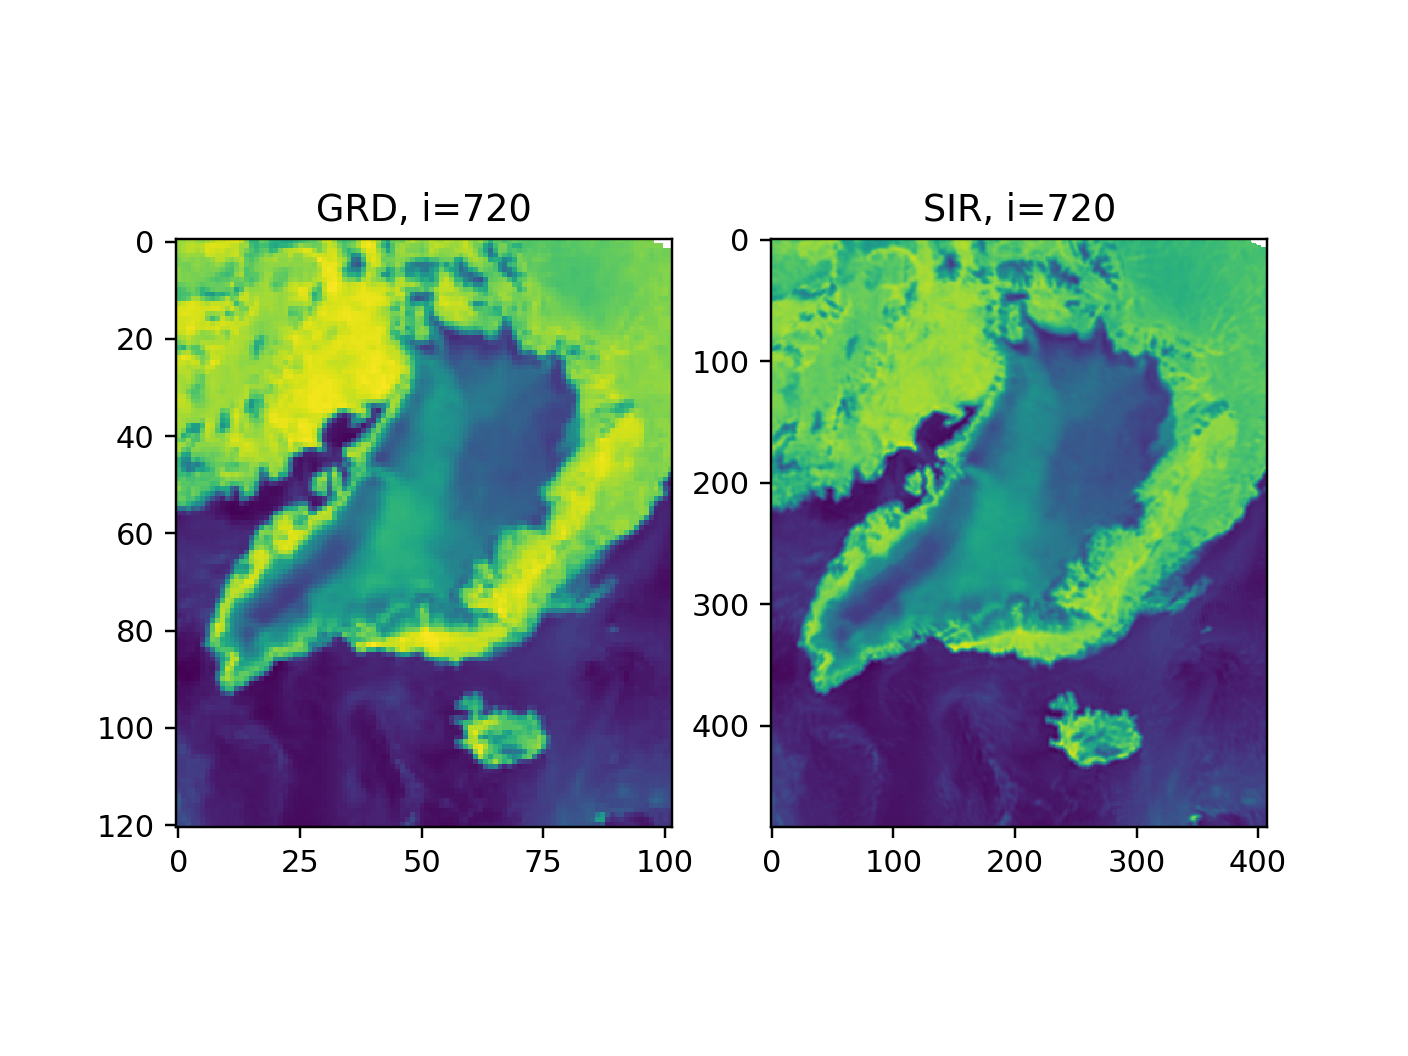

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(layer_grd)
ax[0].set_title("GRD, i=%d" % i)
ax[1].imshow(layer_sir)
ax[1].set_title("SIR, i=%d" % i)

In [96]:
fid_grd.close()
fid_sir.close()

# Look at 18H and 36H data for GRD and SIR, doy = 721 (index=720)

<IPython.core.display.Javascript object>


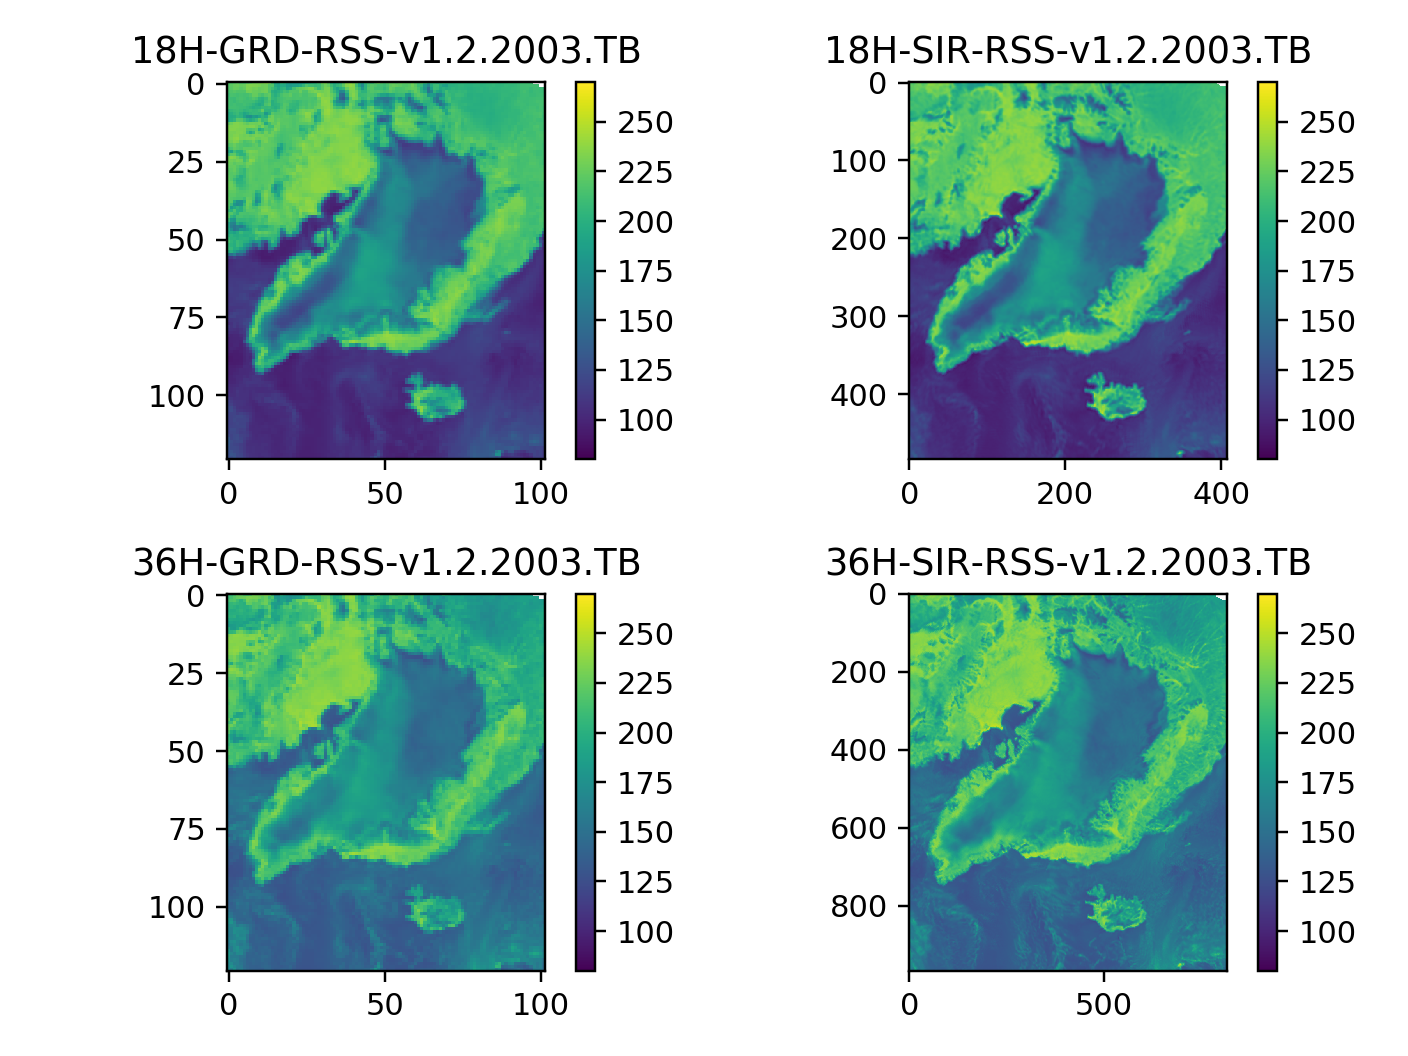

In [110]:
fig, ax = plt.subplots(nrows=2, ncols=2)
i = 720
for j in np.arange(0,4):
    this_ax = ax[int(j/2), mod(j,2)]
    fid = Dataset(list[j], "r", "NETCDF4")
    layer = fid.variables["TB"][i,:,:]
    img = this_ax.imshow(layer, vmin=80, vmax=270)
    fig.colorbar(img, ax=this_ax)
    this_ax.set_title(list[j][-27:-3])
fig.tight_layout()